# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


# 1.(33%) Péndulo
 I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

1. Integral

In [ ]:
from scipy.integrate import quad
import numpy as np
import pandas as pd

#Unidades en sistema internacional
alpha = np.arange(0,91,1)
l = 1
g = 9.8
T_1 = np.zeros(len(alpha))
T_total = np.zeros(len(alpha))
T_total_1 = np.zeros(len(alpha))
error = np.zeros(len(alpha))
T_0 = (2 * np.pi) * (np.sqrt(l / g))

def T(alpha,ro):
  return 1 / (1 - ((np.sin(alpha / 2)) ** 2) * (np.sin(ro)) ** 2) ** 0.5

for i in range(len(alpha)):
  T_1[i], error[i] = quad(T,0,np.pi / 2, args = (alpha[i]))

for i in range(len(alpha)):
  T_total[i] = ((2 * T_0) / np.pi) * T_1[i]

for i in range(len(alpha)):
  T_total_1[i] = T_total[i] / T_0

Cuando theta toma el valor de alpha a la hora de evaluar la integral, se hace cero el denominador, generando problemas.

In [ ]:
datos_integral = pd.DataFrame({})
datos_integral.insert(0,'Amplitud',alpha)
datos_integral.insert(1,'Razón T/t_0',T_total_1)
datos_integral

,Amplitud,Razón T/t_0
0,0,1.000000
1,1,1.078050
2,2,1.094829
3,3,1.001818
4,4,1.060529
...,...,...
86,86,1.098696
87,87,1.073672
88,88,1.000114
89,89,1.082383


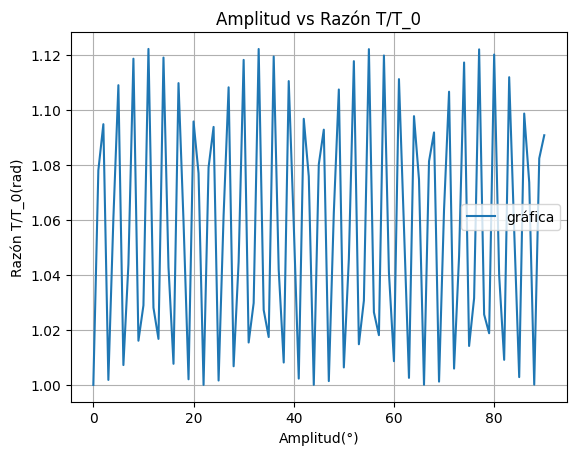

In [ ]:
#Graficos
plt.plot(alpha,T_total_1,label='gráfica')
plt.xlabel('Amplitud(°)')
plt.ylabel('Razón T/T_0(rad)')
plt.title('Amplitud vs Razón T/T_0')
plt.grid()
plt.legend()
plt.show()

Cuando alpha se hace igual a 0 la razón es 1, es decir que para una vecindad de valores cercanos a cero T_0 y T son "iguales".

2 - Calentamiento

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame

a.

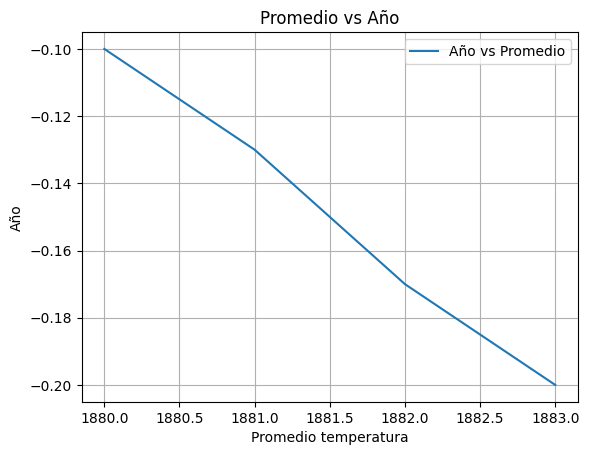

In [ ]:
año_0 = data.Año[0:4]
promedio_5_0 = data.Promedio_5[0:4]
#Graficas
plt.plot(año_0,promedio_5_0,label = 'Año vs Promedio')
plt.xlabel('Promedio temperatura')
plt.ylabel('Año')
plt.title('Promedio vs Año')
plt.grid()
plt.legend()

b.

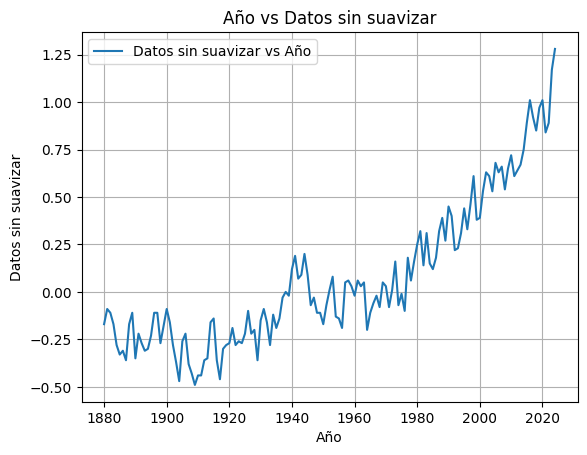

In [ ]:
sin_suavizar = data.NoSauvizado[0:len(data.NoSauvizado)]
año_1 = data.Año[0:len(data.Año)]
#Graficas
plt.plot(año_1,sin_suavizar,label = 'Datos sin suavizar vs Año')
plt.xlabel('Año')
plt.ylabel('Datos sin suavizar')
plt.title('Año vs Datos sin suavizar')
plt.grid()
plt.legend()

C. A partir de 1920 la temperatura ha ido en crecimiento y en los ultimos años se ha incrementado de forma considerable

D.

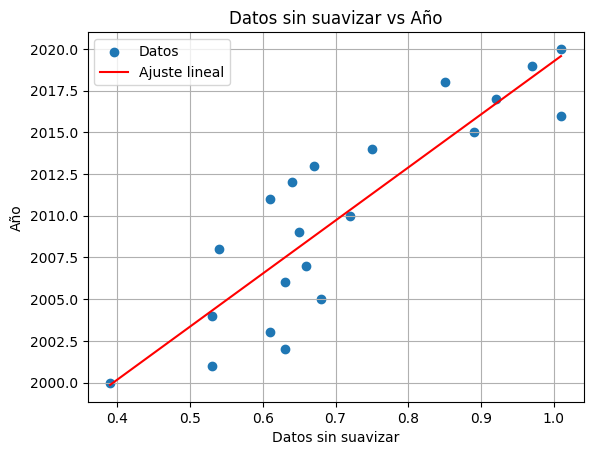

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.zeros(21)
y = np.zeros(21)

for i in range(0,21):

 x[i] = data.NoSauvizado[120 + i]
 y[i] = data.Año[120 + i]

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('Datos sin suavizar')
plt.ylabel('Año')
plt.title('Datos sin suavizar vs Año')
plt.grid()
plt.legend()
plt.show()

E.

In [ ]:
from scipy.interpolate import CubicSpline

datos_año_1 = np.zeros(21)
datos_no_suavizado_1 = np.zeros(21)
datos_promedio_1 = np.zeros(21)

for i in range(0,21):

  datos_año_1[i] = data.Año[120 + i]
  datos_promedio_1[i] = data.Promedio_5[120 + i]
  datos_no_suavizado_1[i] = data.NoSauvizado[120 + i]

año_nosuavizado = CubicSpline(datos_año_1,datos_no_suavizado_1)
año_promedio = CubicSpline(datos_año_1,datos_promedio_1)

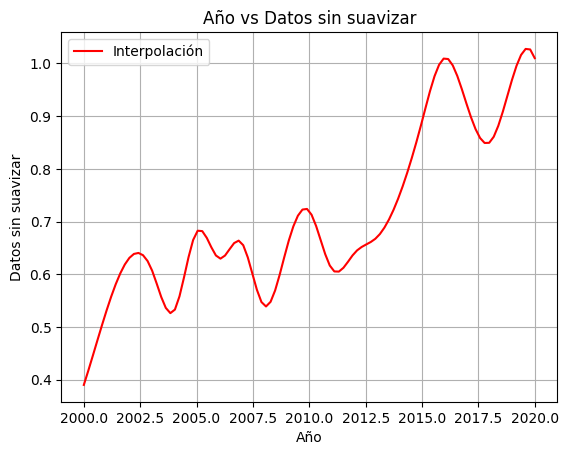

In [ ]:
#Grafica año vs no suavizados
t_0 = np.linspace(2000,2020,100)

grafica_nosuavizado = año_nosuavizado(t_0)
plt.plot(t_0, grafica_nosuavizado, label='Interpolación', color='red')
plt.xlabel('Año')
plt.ylabel('Datos sin suavizar')
plt.title('Año vs Datos sin suavizar')
plt.grid()
plt.legend()
plt.show()

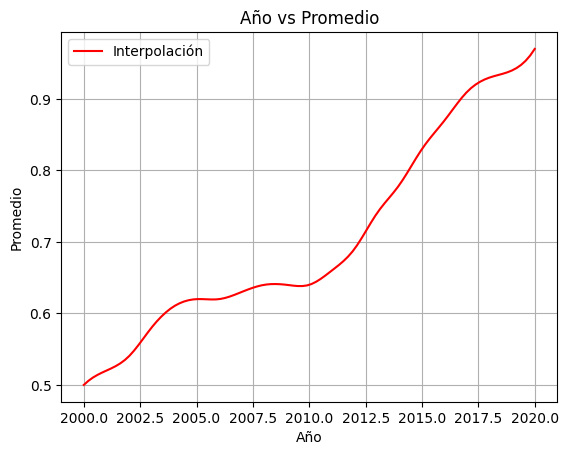

In [ ]:
#Grafica año vs promedios
grafica_promedio= año_promedio(t_0)
plt.plot(t_0, grafica_promedio, label='Interpolación', color='red')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.title('Año vs Promedio')
plt.grid()
plt.legend()
plt.show()

E. Es preferible hacer una interpolación, debido a que representa de manera mas exacta los cambios de temperatura. Claro está con métodos mas precisos, como el de splines cúbicos

F. Una vez se tiene el polinomio se evalua para los años posteriores a 2020 o se usa algun método de extrapolación

# 3 -


a.

In [ ]:
import pandas as pd

url_0 = "https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/refs/heads/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv"
pendulo = pd.read_csv(url_0, sep=';')

In [ ]:
#Cambiar ',' por '.'
pendulo_grados = pendulo['Ángulo 1']

In [ ]:
#Por alguna razón los cambios en los nombres de las filas o en el tipo de variable no se guardan, así que se contruyó este bloque para evitar el problema
pendulo_grados = pendulo_grados.astype(str).str.replace(',', '.').astype(float)
cambio = np.zeros(len(pendulo_grados))
for i in range(len(pendulo_grados)):
  cambio[i] = pendulo_grados[i]

In [ ]:
#Se genera un nuevo DataFrame
pendulo_1 = pendulo.drop('Ángulo 1', axis=1)
pendulo_1.shape

(2847, 1)

In [ ]:
#Cambiar de grados a radianes
def radian(theta):
  return (theta * np.pi) / 180

#Pasamos de grados a radianes
radianita = np.zeros(len(pendulo_1['Tiempo (ms)']))
for i in range(len(pendulo_1['Tiempo (ms)'])):

  radianita[i] = radian(cambio[i])

#Insertamos las dos nuevas columnas
pendulo_1.insert(1,'AnguloDeg',cambio)
pendulo_1.insert(2,'AnguloRad',radianita)

B.

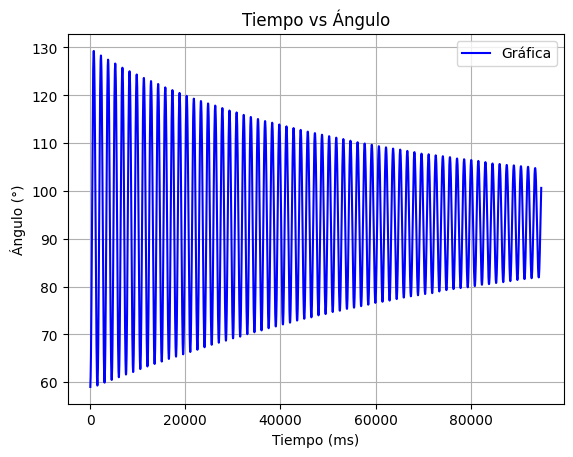

In [ ]:
plt.plot(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])], pendulo_1['AnguloDeg'].iloc[0:len(pendulo_1['Tiempo (ms)'])] , label='Gráfica', color = 'blue')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (°)')
plt.title('Tiempo vs Ángulo')
plt.grid()
plt.legend()
plt.show()

El alcance del pendulo se reduce a medida que el tiempo aumenta, en gran medida gracias a la fricción con el aire.

C.

In [ ]:
def derivacion(a,h = 1.e-6):
  return ((a + h) - (a)) / h

def rapidez_angular(dt,da):
  return da / dt

In [ ]:
#Calculamos los cambios
cambio_angulo = np.zeros(len(pendulo_1['AnguloRad'].iloc[0:len(pendulo_1['AnguloRad'])]))
cambio_tiempo = np.zeros(len(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])]))
rapidez_angular_1 = np.zeros(len(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])]))

for i in range(len(cambio_tiempo)):

  cambio_angulo[i] = derivacion(pendulo_1['AnguloRad'].iloc[i])
  cambio_tiempo[i] = derivacion(pendulo_1['Tiempo (ms)'].iloc[i])
  rapidez_angular_1[i] = rapidez_angular(cambio_tiempo[i],cambio_angulo[i])

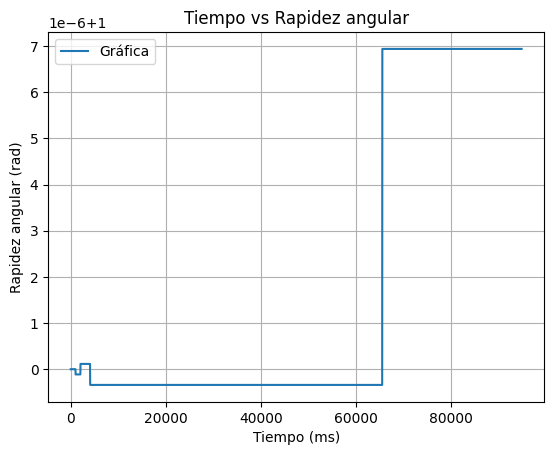

In [ ]:
#Graficamos
plt.plot(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['AnguloRad'])],rapidez_angular_1,label = 'Gráfica')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Rapidez angular (rad)')
plt.title('Tiempo vs Rapidez angular')
plt.grid()
plt.legend()
plt.show()

D.

In [ ]:
#Aceleración angular
cambio_tiempo_1 = np.zeros(len(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])]))
aceleracion_angular = np.zeros(len(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])]))
cambio_angulo_1 = np.zeros(len(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['Tiempo (ms)'])]))

for i in range(len(cambio_tiempo)):

  cambio_angulo_1[i] = derivacion(cambio_angulo[i])
  cambio_tiempo_1[i] = derivacion(cambio_tiempo[i])
  aceleracion_angular[i] = cambio_angulo_1[i] / cambio_tiempo_1[i]

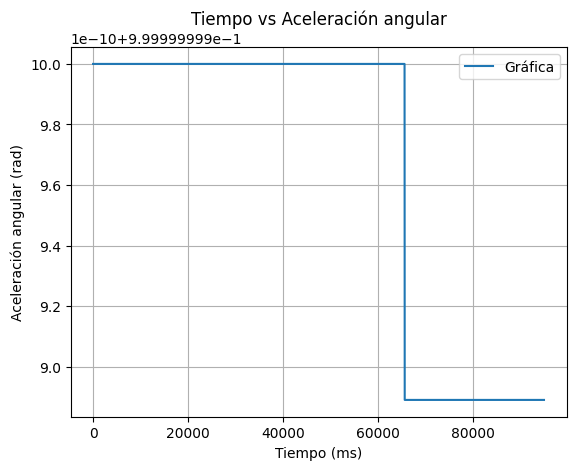

In [ ]:
#Graficamos
plt.plot(pendulo_1['Tiempo (ms)'].iloc[0:len(pendulo_1['AnguloRad'])],aceleracion_angular,label = 'Gráfica')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Aceleración angular (rad)')
plt.title('Tiempo vs Aceleración angular')
plt.grid()
plt.legend()
plt.show()